In [3]:
from collections import Counter
import matplotlib.pyplot as plt
import json
from nltk.tokenize import word_tokenize


def get_word_frequency(data_):
    freqs = Counter()
    for k, v in data_.items():
        if k == 'train' or k == 'validation':
            for item in v:
                caption = list(item.values())[0]['caption']
                tokens = word_tokenize(caption.lower())
                freqs.update(tokens)

    sorted_words = sorted(freqs.items(), key=lambda x: x[1], reverse=True)
    print(len(sorted_words))

    # extract ranks and frequencies
    ranks = [rank+1 for rank, word in enumerate(sorted_words)]
    frequencies = [freq for word, freq in sorted_words]
    return ranks, frequencies

7275


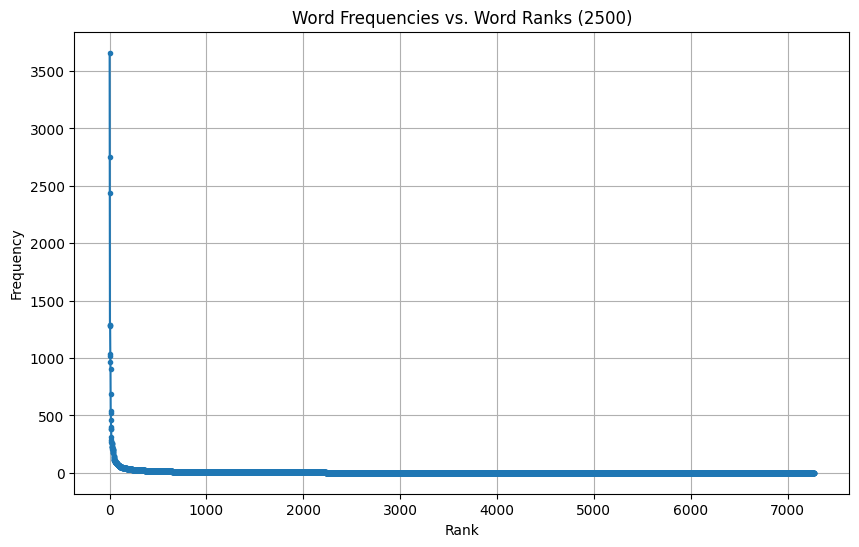

In [4]:
json_data_path = 'selected_dataset/selected_dataset_info.json'
data = json.load(open(json_data_path))
ranks, frequencies = get_word_frequency(data)

plt.figure(figsize=(10, 6))
plt.plot(ranks, frequencies, marker=".")
plt.title("Word Frequencies vs. Word Ranks (2500)")
plt.xlabel("Rank")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

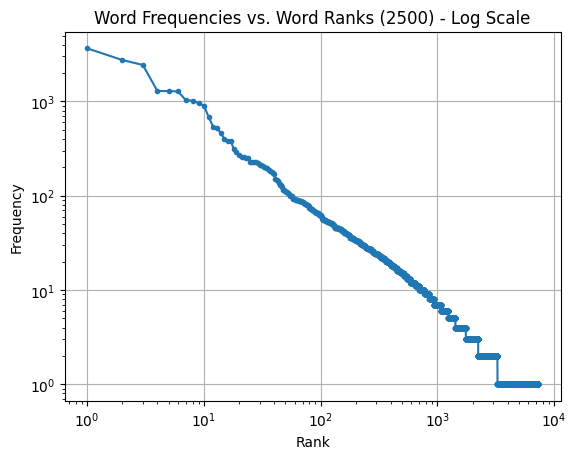

In [5]:
plt.loglog(ranks, frequencies, marker=".")
plt.title("Word Frequencies vs. Word Ranks (2500) - Log Scale")
plt.xlabel("Rank")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()